In [1]:
points = [
    (2,0), (6,0), (6,2), (8,2), (8,5), (5,5), (5,9), (3,9), (3,7), (0,7), (0,2), (2,2) 
]

## Reactangular Partitions of Rectilinear polygon
`
1. Take Right-Bottom corner of the polygon (P)
2. Take any adjusent point(p) that fall within the rectanguliar polygon
3. Create the sub-reactangle (Q)
4. If the cuts or two lines that created the sub-reactangle(Q) has 1 or 2 cut property :
     i. Save the Cut-lines(ln)
    ii. Save the total Cut length (L) 
5. Take the next point as p and repeat step-4
6. If no points left to scan: 
     i. Find the minimum of L
    ii. Remove this sub-reactangle(Q) from the main rectangle (P) and create new polygon P'
   iii. Calcualte the new points for P'
7. Until length of L array is 0 repeat from step 1 with P'
`

In [2]:
# find the point with the lowest y-coordinate and the lowest x-coordinate
def findRightBottomPoint(points):
    x = [p[0] for p in points]
    most_right_x = max(x)
    max_y = 0
    right_bottom_point = (0,0)
    for p in points:
        if p[0] == most_right_x:
            if p[1] > max_y:
                max_y = p[1]
                right_bottom_point = p
    return right_bottom_point

In [3]:
findRightBottomPoint(points)

(8, 5)

In [4]:
#TODO: make function to sort points via path
# sort vertex points boundary wise
def sortPointsViaPath(points):
    pass
sortPointsViaPath(points)

In [5]:
def generateAllBoundaryPoints(points):
    # find the point with the lowest y-coordinate and the lowest x-coordinate
    border = []
    # print(points)
    starting_point = points[0]
    border.append(starting_point)
    current_point = points[0]
    next_point = points[1]
    i = 1
    while (next_point != starting_point):
        # print("Staring from: ", current_point, "To: ", next_point)
        while( current_point != next_point):
            # print(current_point[0]==next_point[0], current_point[1]==next_point[1], current_point[0], next_point[0], current_point[1], next_point[1])
            if(current_point[0]==next_point[0]):
                if(current_point[1]<next_point[1]):
                    current_point = (current_point[0], current_point[1]+1)
                else:
                    current_point = (current_point[0], current_point[1]-1)
            elif(current_point[1]==next_point[1]):
                if(current_point[0]<next_point[0]):
                    current_point = (current_point[0]+1, current_point[1])
                else:
                    current_point = (current_point[0]-1, current_point[1])
            # print("Adding point: ", current_point)
            border.append(current_point)
        if(current_point == next_point):
            # print("Boundary break: ", next_point)
            i += 1
            if(i < len(points)):
                next_point = points[i]
            else:
                next_point = starting_point
    return border
generateAllBoundaryPoints(points)


[(2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (6, 1),
 (6, 2),
 (7, 2),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (7, 5),
 (6, 5),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (4, 9),
 (3, 9),
 (3, 8),
 (3, 7),
 (2, 7),
 (1, 7),
 (0, 7),
 (0, 6),
 (0, 5),
 (0, 4),
 (0, 3),
 (0, 2),
 (1, 2),
 (2, 2)]

In [6]:
boundary = generateAllBoundaryPoints(points)


In [7]:
boundary

[(2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (6, 1),
 (6, 2),
 (7, 2),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (7, 5),
 (6, 5),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (4, 9),
 (3, 9),
 (3, 8),
 (3, 7),
 (2, 7),
 (1, 7),
 (0, 7),
 (0, 6),
 (0, 5),
 (0, 4),
 (0, 3),
 (0, 2),
 (1, 2),
 (2, 2)]

In [8]:
# check if a point is within the enclosed area
def isPointInArea(point, boundary):
    # check if point is within the boundary
    # get heighest and lowest x and y values
    x = [p[0] for p in boundary]
    y = [p[1] for p in boundary]
    most_left_x = min(x)
    most_right_x = max(x)
    most_bottom_y = max(y)
    most_top_y = min(y)
    print("Most left x: ", most_left_x, "Most right x: ", most_right_x, "Most bottom y: ", most_bottom_y, "Most top y: ", most_top_y)
    # go left until you find a point with a higher x-value
    checks = {
        "left": False,
        "right": False,
        "top": False,
        "bottom": False
    }
    # check if point is within the boundary
    # check left side
    p = point
    while(p[0] >= most_left_x):
        # check p is in the boundary
        if(p in boundary):
            checks["left"] = True
            break
        p = (p[0]-1, p[1])
    # check right side
    p = point
    while(p[0] <= most_right_x):
        # check p is in the boundary
        if(p in boundary):
            checks["right"] = True
            break
        p = (p[0]+1, p[1])
    # check top side
    p = point
    while(p[1] >= most_top_y):
        # check p is in the boundary
        if(p in boundary):
            checks["top"] = True
            break
        p = (p[0], p[1]-1)
    # check bottom side
    p = point
    while(p[1] <= most_bottom_y):
        # check p is in the boundary
        if(p in boundary):
            checks["bottom"] = True
            break
        p = (p[0], p[1]+1)
    print(checks)
    return checks["left"] and checks["right"] and checks["top"] and checks["bottom"]

In [9]:
isPointInArea((4,8), boundary)

Most left x:  0 Most right x:  8 Most bottom y:  9 Most top y:  0
{'left': True, 'right': True, 'top': True, 'bottom': True}


True

In [76]:
(2,0) in boundary

True

In [10]:
points

[(2, 0),
 (6, 0),
 (6, 2),
 (8, 2),
 (8, 5),
 (5, 5),
 (5, 9),
 (3, 9),
 (3, 7),
 (0, 7),
 (0, 2),
 (2, 2)]

In [34]:
import matplotlib.pyplot as plt
import numpy as np

<Figure size 432x288 with 0 Axes>

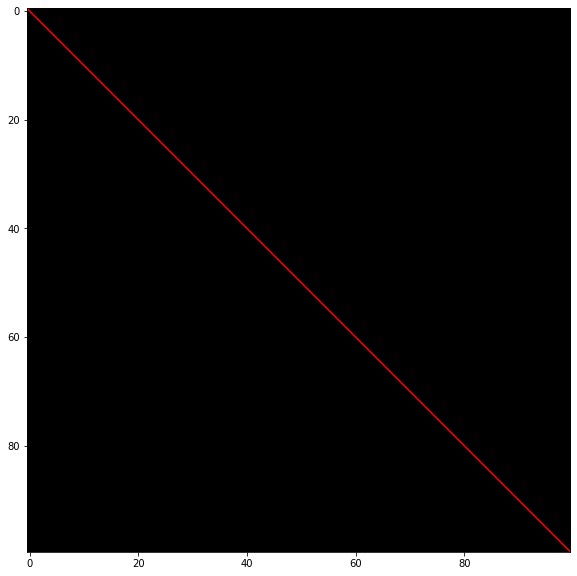

In [60]:

# create a blank image of size 100x100
img = np.zeros((100,100,3), np.uint8)

plt.clf()

fig = plt.figure(figsize=(10, 10))
color =  (255, 0, 0)
# x1, y1 = [0, 0], [20, 20]
x = [0, 0]
y = [40, 40]


plt.axline(x, y, color="r")

plt.imshow(img)

<Figure size 432x288 with 0 Axes>

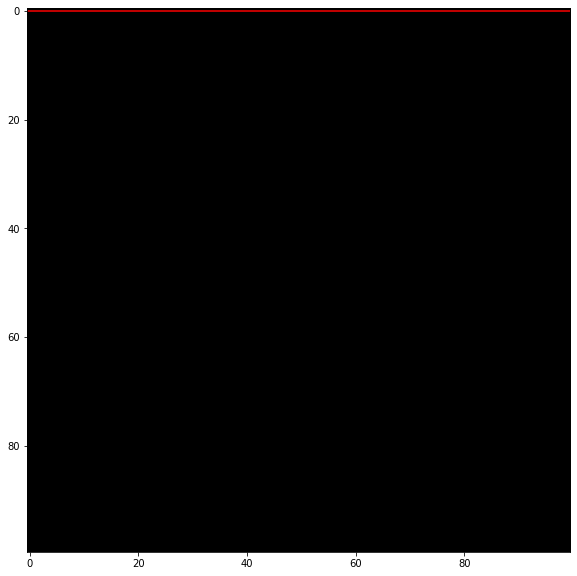

In [59]:
img = np.zeros((100,100,3), np.uint8)
plt.clf()

fig = plt.figure(figsize=(10, 10))
start_point = points[0]
for index in range(len(points)):
    break
    x =  points[index]
    if(index >= len(points)-1):
        y = points[0]
    else:
        y = points[index+1]
    print(index, "Start point: ", x, "End point: ", y)
    # draw a line from start point to end point
    plt.axline(x, y, color="r")
plt.axline([2,0], [0,0], color="r")
plt.imshow(img)

0 Start point:  (2, 0) End point:  (6, 0)
1 Start point:  (6, 0) End point:  (6, 2)
2 Start point:  (6, 2) End point:  (8, 2)
3 Start point:  (8, 2) End point:  (8, 5)
4 Start point:  (8, 5) End point:  (5, 5)
5 Start point:  (5, 5) End point:  (5, 9)
6 Start point:  (5, 9) End point:  (3, 9)
7 Start point:  (3, 9) End point:  (3, 7)
8 Start point:  (3, 7) End point:  (0, 7)
9 Start point:  (0, 7) End point:  (0, 2)
10 Start point:  (0, 2) End point:  (2, 2)
11 Start point:  (2, 2) End point:  (2, 0)
11 Start point:  [0, 0] End point:  [40, 40]


<Figure size 432x288 with 0 Axes>

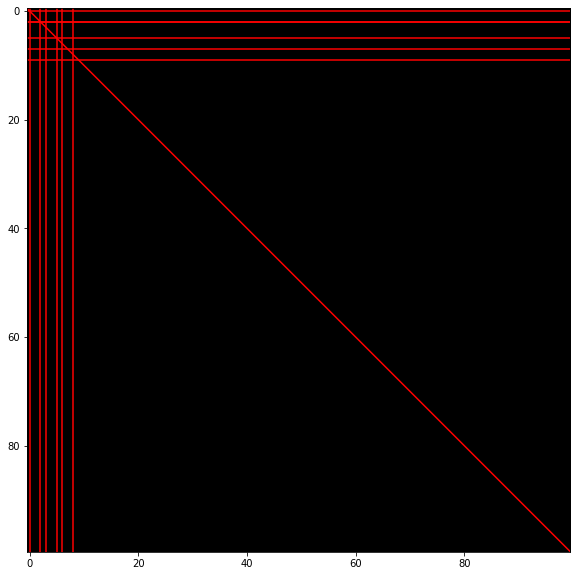

In [63]:

# create a blank image of size 100x100
img = np.zeros((100,100,3), np.uint8)

plt.clf()

fig = plt.figure(figsize=(10, 10))
color =  (255, 0, 0)
# x1, y1 = [0, 0], [20, 20]

start_point = points[0]
for index in range(len(points)):
    x =  points[index]
    if(index >= len(points)-1):
        y = points[0]
    else:
        y = points[index+1]
    print(index, "Start point: ", x, "End point: ", y)
    # draw a line from start point to end point
    # convert tuple to list
    x = list(x)
    y = list(y)
    plt.axline(x, y, color="r")

x = [0, 0]
y = [40, 40]

print(index, "Start point: ", x, "End point: ", y)


plt.axline(x, y, color="r")

plt.imshow(img)